In [7]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [5]:
# load dataset

data = "D:\BelajarData\dataset\CoffeeHouseCafeDataset 1.csv"
df = pd.read_csv(data)
df.head(10)

,Date,Time,Daypart,Category,Item,Quantity,Total Price,Transaction Type
0,2025-01-14,16:34,Afternoon,Snacks,Croissant,2,44000,Delivery
1,2025-01-16,07:44,Morning,Coffee,Americano,2,54000,Dine-in
2,2025-01-13,14:58,Noon,Drinks,Iced Tea,1,25000,Dine-in
3,2025-01-7,14:50,Afternoon,Drinks,Iced Tea,1,25000,Dine-in
4,2025-01-17,11:38,Noon,Snacks,Muffin,1,21000,Dine-in
5,2025-01-12,17:12,Evening,Drinks,Smoothie,2,70000,Takeaway
6,2025-01-25,14:18,Noon,Coffee,Americano,2,54000,Dine-in
7,2025-01-8,11:32,Noon,Coffee,Latte,1,30000,Dine-in
8,2025-01-23,10:40,Noon,Food,Sandwich,1,40000,Takeaway
9,2025-01-17,11:45,Noon,Coffee,Cappuccino,1,28000,Dine-in


In [8]:
# What is the pattern of customer visits and transactions in each time segment (morning, noon, afternoon, night)?
# Grouping data by daypart to analyse total sales and number of transaction

daypart_an = df.groupby("Daypart").agg(
    Total_Transaction=("Total Price", "count"),
    Total_Sales=("Total Price", "sum"),
    Avg_Sale_per_Trc=("Total Price", "mean")
).reset_index()

display(daypart_an)

,Daypart,Total_Transaction,Total_Sales,Avg_Sale_per_Trc
0,Afternoon,182,6889000,37851.648352
1,Evening,290,12202000,42075.862069
2,Morning,325,12848000,39532.307692
3,Noon,203,9185000,45246.305419


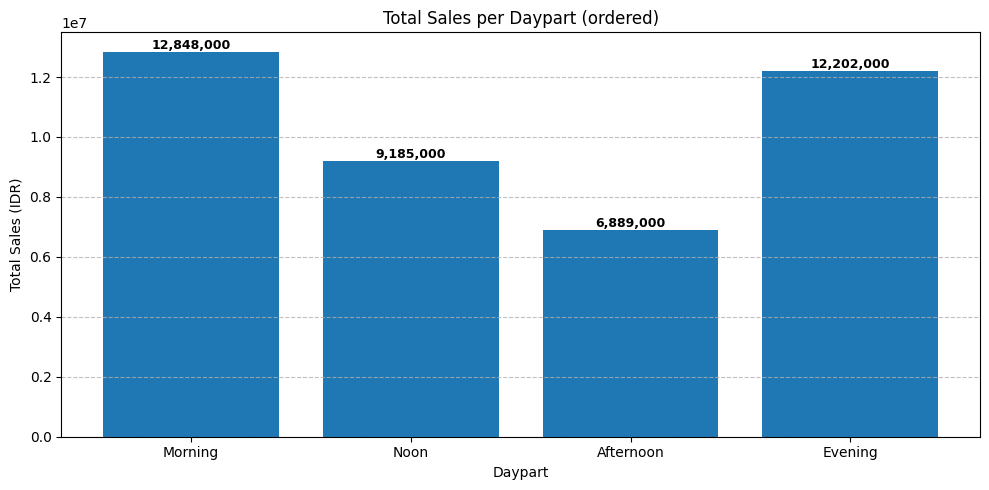

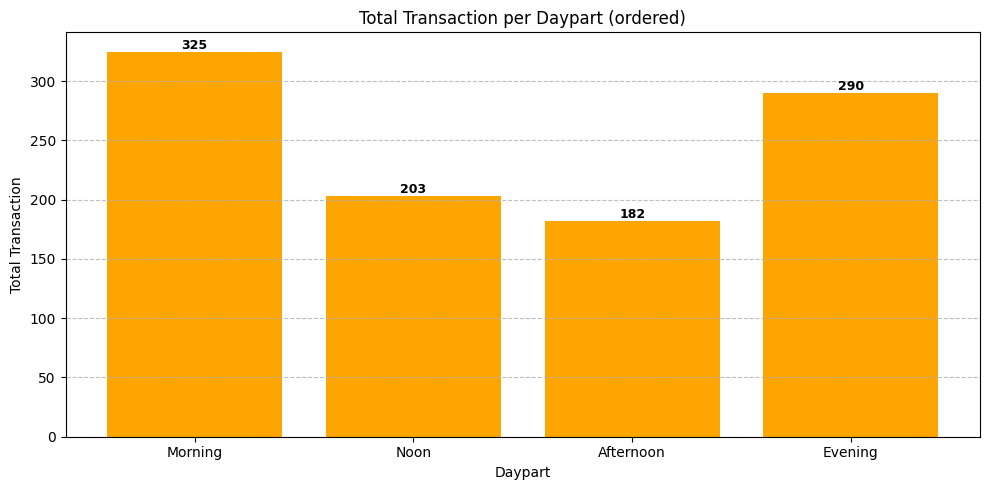

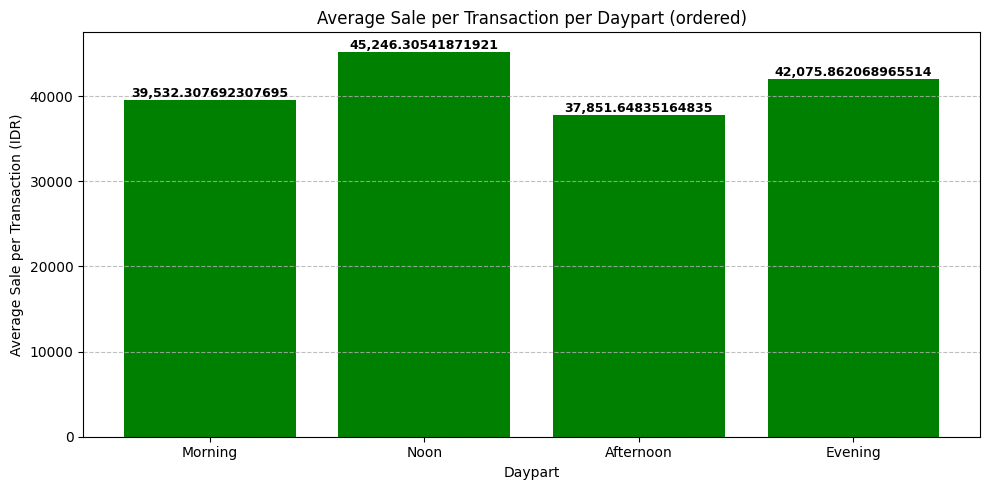

In [54]:
# visualize total sales (ordered) per daypart

daypart_order = ["Morning", "Noon", "Afternoon", "Evening"]
daypart_an_sorted = daypart_an.set_index("Daypart").loc[daypart_order].reset_index()

def add_labels(ax, values):
    for bar, value in zip(ax.patches, values):
        ax.text(bar.get_x() + bar.get_width() / 2, 
                bar.get_height(), 
                f"{value:,}", 
                ha="center", va="bottom", fontsize=9, fontweight='bold')
# Bar chart for total sales per daypart (sorted)
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(daypart_an_sorted["Daypart"], daypart_an_sorted["Total_Sales"])
ax.set_xlabel("Daypart")
ax.set_ylabel("Total Sales (IDR)")
ax.set_title("Total Sales per Daypart (ordered)")
ax.grid(axis="y", linestyle="--", alpha=0.8)
add_labels(ax, daypart_an_sorted["Total_Sales"])

plt.tight_layout()
plt.savefig("Total Sales per Daypart", dpi=600)
plt.show()

# Bar chart for total transactions per daypart (sorted)
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(daypart_an_sorted["Daypart"], daypart_an_sorted["Total_Transaction"], color='orange')
ax.set_xlabel("Daypart")
ax.set_ylabel("Total Transaction")
ax.set_title("Total Transaction per Daypart (ordered)")
ax.grid(axis="y", linestyle="--", alpha=0.8)
add_labels(ax, daypart_an_sorted["Total_Transaction"])

plt.tight_layout()
plt.savefig("Total Transaction per Daypart", dpi=600)
plt.show()

# Bar chart for total sales per daypart (sorted)
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(daypart_an_sorted["Daypart"], daypart_an_sorted["Avg_Sale_per_Trc"], color='green')
ax.set_xlabel("Daypart")
ax.set_ylabel("Average Sale per Transaction (IDR)")
ax.set_title("Average Sale per Transaction per Daypart (ordered)")
ax.grid(axis="y", linestyle="--", alpha=0.8)
add_labels(ax, daypart_an_sorted["Avg_Sale_per_Trc"])

plt.tight_layout()
plt.savefig("Average Sale per Transaction per Daypart", dpi=600)
plt.show()

In [46]:
# What is most ordered menu in each time?
# Analyzing the most ordered menu items per daypart

daypart_order = ["Morning", "Noon", "Afternoon", "Evening"]
df["Daypart"] = pd.Categorical(df["Daypart"], categories=daypart_order, ordered=True)

top_menu_per_dp = df.groupby(["Daypart", "Item"]).agg(
    Total_Order=("Quantity", "sum")
).reset_index()

top_menu_per_dp = top_menu_per_dp.sort_values(["Daypart", "Total_Order"], ascending=[True, False])
top_menu_per_dp = top_menu_per_dp.groupby("Daypart").first().reset_index()

display(top_menu_per_dp)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23108\3429648435.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_menu_per_dp = df.groupby(["Daypart", "Item"]).agg(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23108\3429648435.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_menu_per_dp = top_menu_per_dp.groupby("Daypart").first().reset_index()


,Daypart,Item,Total_Order
0,Morning,Latte,89
1,Noon,Salad,39
2,Afternoon,Americano,52
3,Evening,Cappuccino,55


In [47]:
# Is there a difference in transaction patterns between weekdays and weekends in each time slot?
df["Date"] = pd.to_datetime(df["Date"])
df["Day_Type"] = df["Date"].dt.dayofweek.apply(lambda x: "Weekday" if x < 5 else "Weekend")

transaction_an = df.groupby(["Day_Type", "Daypart"]).agg(
    Total_Transaction=("Total Price", "count"),
    Total_Sales=("Total Price","sum"),
    Avg_Sale_per_Trc=("Total Price", "mean")
).reset_index()

display(transaction_an)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23108\2495352550.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_an = df.groupby(["Day_Type", "Daypart"]).agg(


,Day_Type,Daypart,Total_Transaction,Total_Sales,Avg_Sale_per_Trc
0,Weekday,Morning,248,9698000,39104.838710
1,Weekday,Noon,154,6691000,43448.051948
2,Weekday,Afternoon,134,5126000,38253.731343
3,Weekday,Evening,216,9095000,42106.481481
4,Weekend,Morning,77,3150000,40909.090909
5,Weekend,Noon,49,2494000,50897.959184
6,Weekend,Afternoon,48,1763000,36729.166667
7,Weekend,Evening,74,3107000,41986.486486


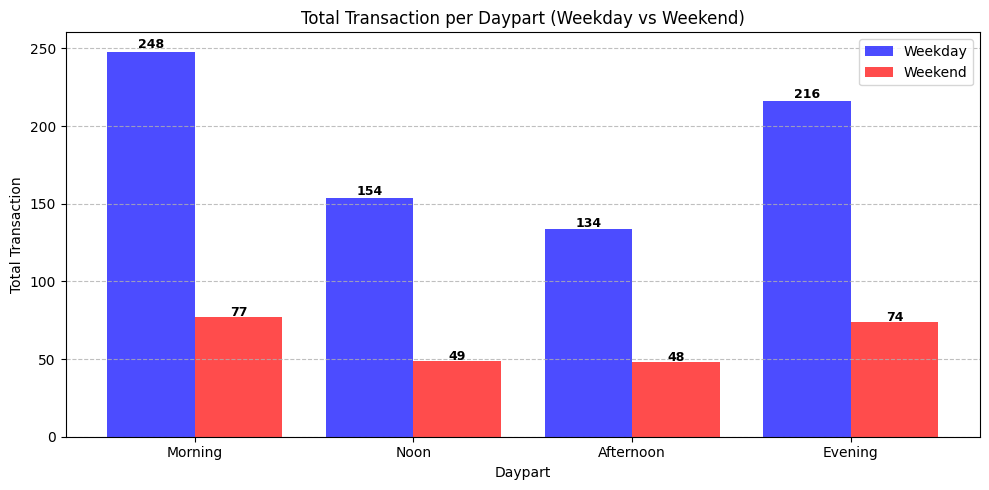

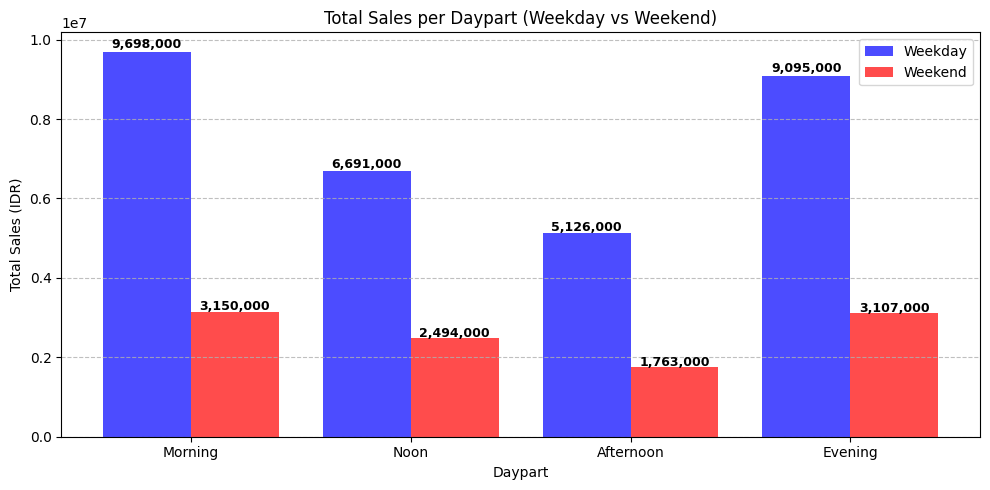

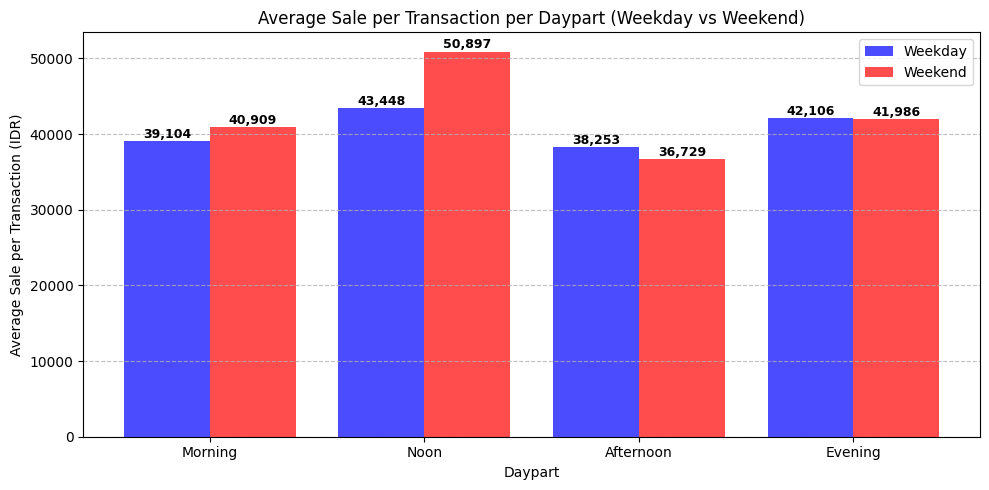

In [55]:
# visualize result of number 3

colors = {"Weekday": "blue", "Weekend": "red"}

def add_labels(ax, data):
    for i, v in enumerate(data):
        ax.text(i, v + (v*0.01), f"{v:,}",
               ha='center', fontsize=9, fontweight='bold')

wd_data = transaction_an[transaction_an["Day_Type"] == "Weekday"]
we_data = transaction_an[transaction_an["Day_Type"] == "Weekend"]

bar_width = 0.4
x_labels = wd_data["Daypart"]
x = np.arange(len(x_labels))

def add_grouped_labels(ax, data1, data2, x_pos, width):
    for i, (v1, v2) in enumerate(zip(data1, data2)):
        ax.text(x_pos[i] - width/2, v1 + (v1 * 0.01), f"{int(v1):,}", ha='center', fontsize=9, fontweight='bold')
        ax.text(x_pos[i] + width/2, v2 + (v2 * 0.01), f"{int(v2):,}", ha='center', fontsize=9, fontweight='bold')

# Total Transactions per Daypart (Side by Side with Labels)
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - bar_width/2, wd_data["Total_Transaction"], bar_width, label="Weekday", color="blue", alpha=0.7)
bars2 = ax.bar(x + bar_width/2, we_data["Total_Transaction"], bar_width, label="Weekend", color="red", alpha=0.7)
ax.set_xlabel("Daypart")
ax.set_ylabel("Total Transaction")
ax.set_title("Total Transaction per Daypart (Weekday vs Weekend)")
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.8)
add_grouped_labels(ax, wd_data["Total_Transaction"], we_data["Total_Transaction"], x, bar_width)

plt.tight_layout()
plt.savefig("Total Transactions per Daypart (Side by Side with Labels)", dpi=600)
plt.show()

# Total Sales per Daypart (Side by Side with Labels)
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - bar_width/2, wd_data["Total_Sales"], bar_width, label="Weekday", color="blue", alpha=0.7)
bars2 = ax.bar(x + bar_width/2, we_data["Total_Sales"], bar_width, label="Weekend", color="red", alpha=0.7)
ax.set_xlabel("Daypart")
ax.set_ylabel("Total Sales (IDR)")
ax.set_title("Total Sales per Daypart (Weekday vs Weekend)")
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.8)
add_grouped_labels(ax, wd_data["Total_Sales"], we_data["Total_Sales"], x, bar_width)

plt.tight_layout()
plt.savefig("Total Sales per Daypart (Side by Side with Labels)", dpi=600)
plt.show()

# Average Sale per Transaction per Daypart (Side by Side with Labels)
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - bar_width/2, wd_data["Avg_Sale_per_Trc"], bar_width, label="Weekday", color="blue", alpha=0.7)
bars2 = ax.bar(x + bar_width/2, we_data["Avg_Sale_per_Trc"], bar_width, label="Weekend", color="red", alpha=0.7)
ax.set_xlabel("Daypart")
ax.set_ylabel("Average Sale per Transaction (IDR)")
ax.set_title("Average Sale per Transaction per Daypart (Weekday vs Weekend)")
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.8)
add_grouped_labels(ax, wd_data["Avg_Sale_per_Trc"], we_data["Avg_Sale_per_Trc"], x, bar_width)

plt.tight_layout()
plt.savefig("Avg Sale per Transaction per Daypart (Side by Side with Labels)", dpi=600)
plt.show()

In [49]:
# How do the number of dine-in, take-away, and delivery transactions in each daypart compare?

trc_type_an = df.groupby(["Daypart", "Transaction Type"]).agg(
    Total_Transaction=("Total Price", "count")
).reset_index()

# pivoting data
trc_type_pivot = trc_type_an.pivot(index="Daypart", columns="Transaction Type", values="Total_Transaction").fillna(0)

display(trc_type_pivot)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23108\977165684.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trc_type_an = df.groupby(["Daypart", "Transaction Type"]).agg(


Transaction Type,Delivery,Dine-in,Takeaway
Daypart,,,
Morning,30,191,104
Noon,23,120,60
Afternoon,21,109,52
Evening,39,160,91


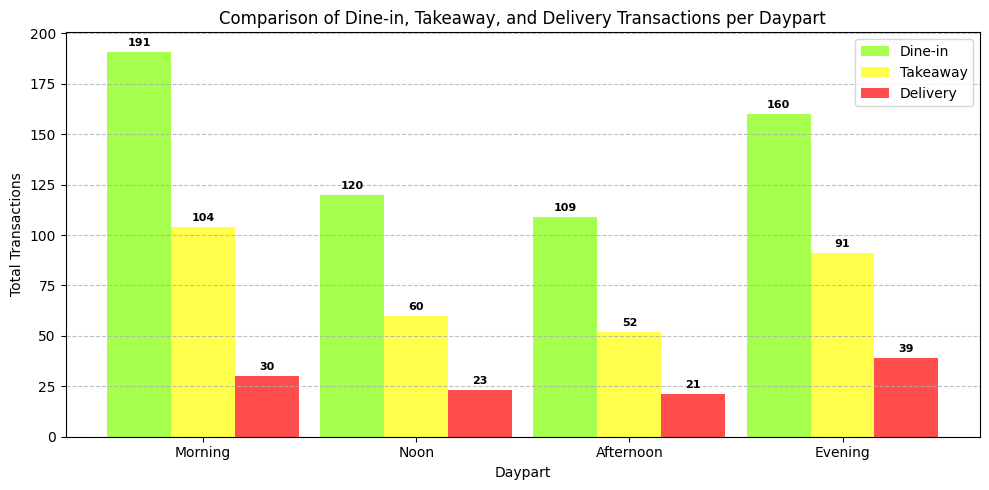

In [56]:
# Creating a side-by-side bar chart for transaction types per daypart

# Define width for grouped bars
bar_width = 0.3
x_labels = trc_type_pivot.index
x = np.arange(len(x_labels))

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - bar_width, trc_type_pivot["Dine-in"], bar_width, label="Dine-in", color="chartreuse", alpha=0.7)
ax.bar(x, trc_type_pivot["Takeaway"], bar_width, label="Takeaway", color="yellow", alpha=0.7)
ax.bar(x + bar_width, trc_type_pivot["Delivery"], bar_width, label="Delivery", color="red", alpha=0.7)

ax.set_xlabel("Daypart")
ax.set_ylabel("Total Transactions")
ax.set_title("Comparison of Dine-in, Takeaway, and Delivery Transactions per Daypart")
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.8)

for i, (dine, takeaway, delivery) in enumerate(zip(trc_type_pivot["Dine-in"], trc_type_pivot["Takeaway"], trc_type_pivot["Delivery"])):
    ax.text(i - bar_width, dine + 3, f"{int(dine)}", ha='center', fontsize=8, fontweight='bold')
    ax.text(i, takeaway + 3, f"{int(takeaway)}", ha='center', fontsize=8, fontweight='bold')
    ax.text(i + bar_width, delivery + 3, f"{int(delivery)}", ha='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig("Comparison transaction type", dpi=600)
plt.show()